<a href="https://colab.research.google.com/github/nxxk23/AI-Engineer/blob/main/BertModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers pandas torch

In [2]:
%pip install transformers accelerate -U

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/AIEngineer/data.csv")
df = df.drop(columns=['Unnamed: 0'])
df.head(5)

,subject,description,ticket_type,clean_subject,clean_description,tokenized_subject,tokenized_description,meaning_subject,meaning_description
0,Interlink : MA วันที่ 15 กรกฎาคม 2565 เวลา 00....,"From: ""NQM Interlink Telecom"" <nqm@interlinkte...",Request,ma น น cid inextbaac สาขา หน่วยบ...,เรื่อง ขอกำหนดการปรับปรุงการให้บริการ บริษัท ไ...,"['ma', 'น', 'น', 'cid', 'inextbaac', 'สาขา', '...","['เรื่อง', 'ขอ', 'กำหนด', 'การปรับปรุง', 'การ'...","['inextbaac', 'cid', 'สาขา', 'หน่วยบุรีรัมย์',...","['ท่าน', 'สิ้นสุดดำเนินการ', 'ปรับปรุง', 'ขอจั..."
1,[Closed]Promessy Corporation : แจ้งตรวจสอบเครื...,From: Werachat Nawaroongruang <werachat.nawaro...,Request,promessy corporation ตรวจสอบเครื่อง ip r...,inet team เครื่อง private ip ได้มีการ rest...,"['promessy', 'corporation', 'ตรวจสอบ', 'เครื่อ...","['inet', 'team', 'เครื่อง', 'private', 'ip', '...","['ip', 'restart', 'ตรวจสอบเครื่อง', 'โดยไม่ทรา...","['team', 'ได้มีการ', 'รบกวนเช็คให้หน่อยครับ', ..."
2,BAAC : รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสาร...,รับสายลูกค้าคุณสุริยา เบอร์ 0818863505 แจ้งมีต...,Request,รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสารภี เนื่...,รับสายลูกค้าคุณสุริยา เบอร์ มีตัวกล่องอุปกรณ์...,"['รบกวน', 'เข้าไป', 'เก็บตัว', 'กล่อง', 'สัญญา...","['รับสาย', 'ลูกค้า', 'คุณ', 'สุริยา', 'เบอร์',...","['เข้าไป', 'สารภี', 'เนื่องจากมีการย้ายอาคารไป...","['เข้าไป', 'เดิม', 'โทร', 'เพชร', 'ตัว', 'สุภา..."
3,Transform You : แจ้งขอข้อมูล Lun ดังนี้ Offsit...,"From: ""Teerayut Saowamok"" <teerayut.sa@transfo...",Request,ขอข้อมูล lun ดังนี้ offsite อยู่ที่ idc ไหนและ...,noc รบกวนเปิดเคสประสานงานทีม op cloud ทางทีม t...,"['ขอ', 'ข้อมูล', 'lun', 'ดังนี้', 'offsite', '...","['noc', 'รบกวน', 'เปิด', 'เคส', 'ประสานงาน', '...","['ดังนี้', 'full', 'อยู่ที่', 'ไหนและ', 'offsi...","['full', 'aci', 'เคส', 'sas', 'op', 'offsite',..."
4,GSB[SD] : แบบคำขอเปลี่ยนแปลงทรัพยากรบน GSB Clo...,From: Servicedesk <servicedesk@inetms.co.th>\n...,Request,แบบคำขอเปลี่ยนแปลงทรัพยากรบน gsb cloud based s...,noc ครับ subject internal gsb sr รับ ร...,"['แบบ', 'คำขอ', 'เปลี่ยนแปลง', 'ทรัพยากร', 'บน...","['noc', 'ครับ', 'subject', 'internal', 'gsb', ...","['แบบคำขอเปลี่ยนแปลงทรัพยากรบน', 'กรมการปกครอง...","['อายุการใช้งาน', 'ทรัพยากร', 'gsb', 'gateway'..."


In [6]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [8]:
df['sentence'] = df['clean_subject'] + ' ' + df['clean_description']
df['sentence'].loc[0]

'ma     น      น   cid  inextbaac   สาขา หน่วยบุรีรัมย์ เรื่อง ขอกำหนดการปรับปรุงการให้บริการ บริษัท ไอเน็กซ์ บรอดแบนด์ จำกัด ขอจัดส่งจดหมายปรับปรุงการบริการวงจร จำนวน  วงจร วัตถุประ์การดำเนินการ   ปรับปรุงบริการโครงข่าย เนื่องจากจะดำเนินการ replace อุปกรณ์ภายใน node พื้นที่ดำเนินการ   node บุรีรัมย์ site interlink วัน เริ่มดำเนินการ       น  วัน สิ้นสุดดำเนินการ       น  ระยะกระทบ   กระทบบริการไม่เกิน   ชั่วโมง รายละเอียดทั้งหมดตาม เอกสารแนบมา จึงมาโปรดทราบความจำเป็นดังกล่าว และบริษัทฯ ขออภัยในความไม่สะดวกในครั้งนี้ หากท่านมีข้อสงสัยหรือต้องการข้อมูลเพิ่มเติม โปรดติดต่อตามหมายเลขด้านล่าง หรือ reply mail กลับมาที่'

In [9]:
data = df[['ticket_type','sentence']]
data.head(5)

,ticket_type,sentence
0,Request,ma น น cid inextbaac สาขา หน่วยบ...
1,Request,promessy corporation ตรวจสอบเครื่อง ip r...
2,Request,รบกวนเข้าไปเก็บตัวกล่องสัญญาณที่สาขาสารภี เนื่...
3,Request,ขอข้อมูล lun ดังนี้ offsite อยู่ที่ idc ไหนและ...
4,Request,แบบคำขอเปลี่ยนแปลงทรัพยากรบน gsb cloud based s...


In [11]:
data.dropna(subset=['sentence'], inplace=True)

<ipython-input-11-ca873a3b1d33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['sentence'], inplace=True)


In [12]:
# check class distribution
data['ticket_type'].value_counts(normalize = True)

ticket_type
Request     0.580555
Incident    0.412498
Problem     0.006947
Name: proportion, dtype: float64

In [13]:
data.isnull().sum()

ticket_type    0
sentence       0
dtype: int64

In [14]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['sentence'], data['ticket_type'],
                                                                    random_state=2018,
                                                                    test_size=0.3,
                                                                    stratify=data['ticket_type'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=2018,
                                                                test_size=0.3,
                                                                stratify=temp_labels)

In [15]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<Axes: >

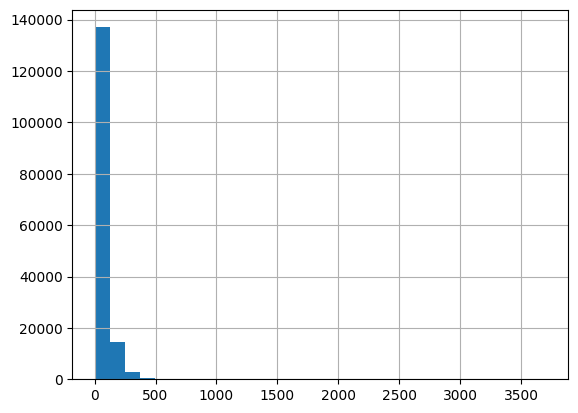

In [16]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [17]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the labels
train_labels = le.fit_transform(train_labels)
val_labels = le.transform(val_labels)
test_labels = le.transform(test_labels)

In [20]:
import torch

# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels)

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels)

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels)

In [21]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Batch size
batch_size = 16

# Create TensorDataset for training data
train_data = TensorDataset(train_seq, train_mask, train_y)
# Create a RandomSampler for training data
train_sampler = RandomSampler(train_data)
# Create DataLoader for training data
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_seq, val_mask, val_y)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# (Optional) Create TensorDataset and DataLoader for test data if needed
# test_data = TensorDataset(test_seq, test_mask, test_y)
# test_sampler = SequentialSampler(test_data)
# test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [22]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [23]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
        super(BERT_Arch, self).__init__()

        self.bert = bert

        # dropout layer
        self.dropout = nn.Dropout(0.1)

        # relu activation function
        self.relu =  nn.ReLU()

        # dense layer 1
        self.fc1 = nn.Linear(768,512)

        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)

        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

        #pass the inputs to the model
        _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)

        x = self.fc1(cls_hs)

        x = self.relu(x)

        x = self.dropout(x)

        # output layer
        x = self.fc2(x)

        # apply softmax activation
        x = self.softmax(x)

        return x

In [24]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW
from sklearn.utils.class_weight import compute_class_weight

# define the optimizer
optimizer = AdamW(model.parameters(),lr = 1e-5)

#compute the class weights
class_weights = compute_class_weight('balanced', np.unique(train_labels), train_labels)

print('Class Weights:',class_weights)

In [ ]:
# converting list of class weights to a tensor
weights= torch.tensor(class_weights,dtype=torch.float)

# push to GPU
weights = weights.to(device)

# define the loss function
cross_entropy  = nn.NLLLoss(weight=weights)

# number of training epochs
epochs = 5

In [ ]:
# function to train the model
def train():

    model.train()
    total_loss, total_accuracy = 0, 0

    # empty list to save model predictions
    total_preds=[]

    # iterate over batches
    for step,batch in enumerate(train_dataloader):

        # progress update after every 50 batches.
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        # push the batch to gpu
        batch = [r.to(device) for r in batch]

        sent_id, mask, labels = batch

        # clear previously calculated gradients
        model.zero_grad()

        # get model predictions for the current batch
        preds = model(sent_id, mask)

        # compute the loss between actual and predicted values
        loss = cross_entropy(preds, labels)

        # add on to the total loss
        total_loss = total_loss + loss.item()

        # backward pass to calculate the gradients
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # update parameters
        optimizer.step()

        # model predictions are stored on GPU. So, push it to CPU
        preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

    # compute the training loss of the epoch
    avg_loss = total_loss / len(train_dataloader)

      # predictions are in the form of (no. of batches, size of batch, no. of classes).
      # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():

    print("\nEvaluating...")

    # deactivate dropout layers
    model.eval()

    total_loss, total_accuracy = 0, 0

    # empty list to save the model predictions
    total_preds = []

    # iterate over batches
    for step,batch in enumerate(val_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:

            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        # push the batch to gpu
        batch = [t.to(device) for t in batch]

        sent_id, mask, labels = batch

        # deactivate autograd
        with torch.no_grad():

            # model predictions
            preds = model(sent_id, mask)

            # compute the validation loss between actual and predicted values
            loss = cross_entropy(preds,labels)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    # compute the validation loss of the epoch
    avg_loss = total_loss / len(val_dataloader)

    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

#defining epochs
epochs = 1

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):

    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    #train model
    train_loss, _ = train()

    #evaluate model
    valid_loss, _ = evaluate()

    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')

    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')

In [ ]:
# load weights of best modelpath = 'saved_weights.pt'model.load_state_dict(torch.load(path))

In [ ]:
# get predictions for test data
with torch.no_grad():
    preds = model(test_seq.to(device), test_mask.to(device))
    preds = preds.detach().cpu().numpy()


# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))
